# Installing Libraries

In [21]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [43]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, PadIfNeeded, RandomCrop, Normalize, HorizontalFlip, ShiftScaleRotate, CoarseDropout
from albumentations.pytorch.transforms import ToTensorV2


# Albumentation - Transformations


In [44]:
class Album_train():
    def __init__(self):
        self.albumentations_transform = Compose([
            HorizontalFlip(),
            ShiftScaleRotate(),
#            Cutout(num_holes=1, max_h_size=8, max_w_size=8, fill_value=[0.4914*255, 0.4822*255, 0.4471*255], always_apply=True, p=1.00),
            CoarseDropout(max_holes=3, max_height=8, max_width=8, min_holes=None, min_height=4, min_width=4, fill_value=[0.4914*255, 0.4822*255, 0.4471*255], mask_fill_value=None, always_apply=False, p=0.7),
            Normalize(mean=[0.4914, 0.4822, 0.4471],std=[0.2469, 0.2433, 0.2615]),
            ToTensorV2()
        ])
    def __call__(self,img):
        img = np.array(img)
        img = self.albumentations_transform(image=img)['image']
        return img

class Album_test():
    def __init__(self):
        self.albumentations_transform = Compose([
            Normalize(mean=[0.4914, 0.4822, 0.4471],std=[0.2469, 0.2433, 0.2615]),
            ToTensorV2()
        ])

    def __call__(self,img):
        img = np.array(img)
        img = self.albumentations_transform(image=img)['image']
        return img

# Dataset defining

In [45]:
train = datasets.CIFAR10('./Data',
                            train=True,
                            transform=Album_train(),
                            download=True)

test = datasets.CIFAR10('./Data',
                                train=False,
                                transform=Album_test(),
                                download=True)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [46]:
SEED = 1

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
# Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create.
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [47]:
import src.model
import src.utilities

from src.model import *
from src.utilities import *

## Plotting Random train images

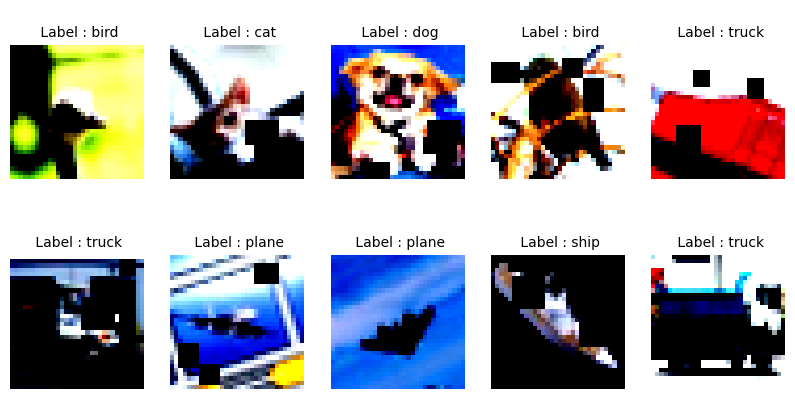

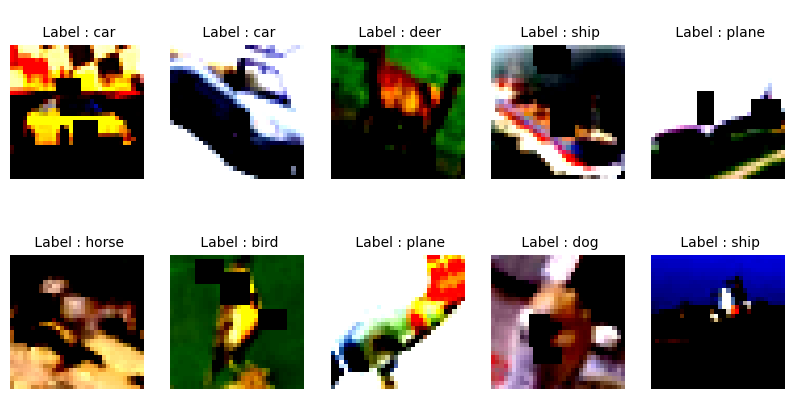

In [48]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)
show_images(train_loader)

# Model Summary


In [49]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(norm='LN').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Train and Test of our model

In [50]:
from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

MAX_EPOCHS = 20
for epoch in range(MAX_EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.672205924987793 Batch_id=390 Accuracy=31.67: 100%|██████████| 391/391 [00:20<00:00, 19.46it/s]



Test set: Average loss: 1.6252, Accuracy: 4192/10000 (41.92%)

EPOCH: 2


Loss=1.5829402208328247 Batch_id=390 Accuracy=41.55: 100%|██████████| 391/391 [00:22<00:00, 17.76it/s]



Test set: Average loss: 1.4573, Accuracy: 4719/10000 (47.19%)

EPOCH: 3


Loss=1.4535605907440186 Batch_id=390 Accuracy=46.66: 100%|██████████| 391/391 [00:21<00:00, 18.41it/s]



Test set: Average loss: 1.3407, Accuracy: 5128/10000 (51.28%)

EPOCH: 4


Loss=1.2860060930252075 Batch_id=390 Accuracy=50.36: 100%|██████████| 391/391 [00:20<00:00, 19.10it/s]



Test set: Average loss: 1.1930, Accuracy: 5720/10000 (57.20%)

EPOCH: 5


Loss=1.1715772151947021 Batch_id=390 Accuracy=52.62: 100%|██████████| 391/391 [00:21<00:00, 18.05it/s]



Test set: Average loss: 1.1448, Accuracy: 5902/10000 (59.02%)

EPOCH: 6


Loss=1.1911276578903198 Batch_id=390 Accuracy=55.19: 100%|██████████| 391/391 [00:21<00:00, 18.40it/s]



Test set: Average loss: 1.0761, Accuracy: 6198/10000 (61.98%)

EPOCH: 7


Loss=1.0414599180221558 Batch_id=390 Accuracy=56.65: 100%|██████████| 391/391 [00:21<00:00, 18.37it/s]



Test set: Average loss: 1.0646, Accuracy: 6240/10000 (62.40%)

EPOCH: 8


Loss=1.1593116521835327 Batch_id=390 Accuracy=58.30: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]



Test set: Average loss: 1.0074, Accuracy: 6491/10000 (64.91%)

EPOCH: 9


Loss=1.0600130558013916 Batch_id=390 Accuracy=59.35: 100%|██████████| 391/391 [00:19<00:00, 20.00it/s]



Test set: Average loss: 0.9310, Accuracy: 6697/10000 (66.97%)

EPOCH: 10


Loss=0.8999506831169128 Batch_id=390 Accuracy=60.35: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]



Test set: Average loss: 0.9451, Accuracy: 6725/10000 (67.25%)

EPOCH: 11


Loss=0.9504709243774414 Batch_id=390 Accuracy=61.47: 100%|██████████| 391/391 [00:20<00:00, 19.17it/s]



Test set: Average loss: 0.9357, Accuracy: 6763/10000 (67.63%)

EPOCH: 12


Loss=1.109895944595337 Batch_id=390 Accuracy=61.58: 100%|██████████| 391/391 [00:19<00:00, 20.41it/s]



Test set: Average loss: 0.8888, Accuracy: 6922/10000 (69.22%)

EPOCH: 13


Loss=1.3834048509597778 Batch_id=390 Accuracy=62.65: 100%|██████████| 391/391 [00:19<00:00, 20.10it/s]



Test set: Average loss: 0.8593, Accuracy: 6989/10000 (69.89%)

EPOCH: 14


Loss=0.8941435813903809 Batch_id=390 Accuracy=63.22: 100%|██████████| 391/391 [00:19<00:00, 19.59it/s]



Test set: Average loss: 0.8376, Accuracy: 7052/10000 (70.52%)

EPOCH: 15


Loss=1.2357633113861084 Batch_id=390 Accuracy=63.38: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]



Test set: Average loss: 0.8613, Accuracy: 7022/10000 (70.22%)

EPOCH: 16


Loss=0.9690284729003906 Batch_id=390 Accuracy=64.36: 100%|██████████| 391/391 [00:18<00:00, 20.60it/s]



Test set: Average loss: 0.8653, Accuracy: 7040/10000 (70.40%)

EPOCH: 17


Loss=0.9265608787536621 Batch_id=390 Accuracy=64.84: 100%|██████████| 391/391 [00:21<00:00, 18.53it/s]



Test set: Average loss: 0.8109, Accuracy: 7209/10000 (72.09%)

EPOCH: 18


Loss=0.8414053916931152 Batch_id=390 Accuracy=65.42: 100%|██████████| 391/391 [00:18<00:00, 20.62it/s]



Test set: Average loss: 0.8026, Accuracy: 7215/10000 (72.15%)

EPOCH: 19


Loss=1.1400127410888672 Batch_id=390 Accuracy=65.41: 100%|██████████| 391/391 [00:19<00:00, 19.91it/s]



Test set: Average loss: 0.7739, Accuracy: 7334/10000 (73.34%)

EPOCH: 20


Loss=1.1317675113677979 Batch_id=390 Accuracy=65.72: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]



Test set: Average loss: 0.7879, Accuracy: 7252/10000 (72.52%)



In [51]:
train_losses1 = [t.cpu().item() for t in train_losses]

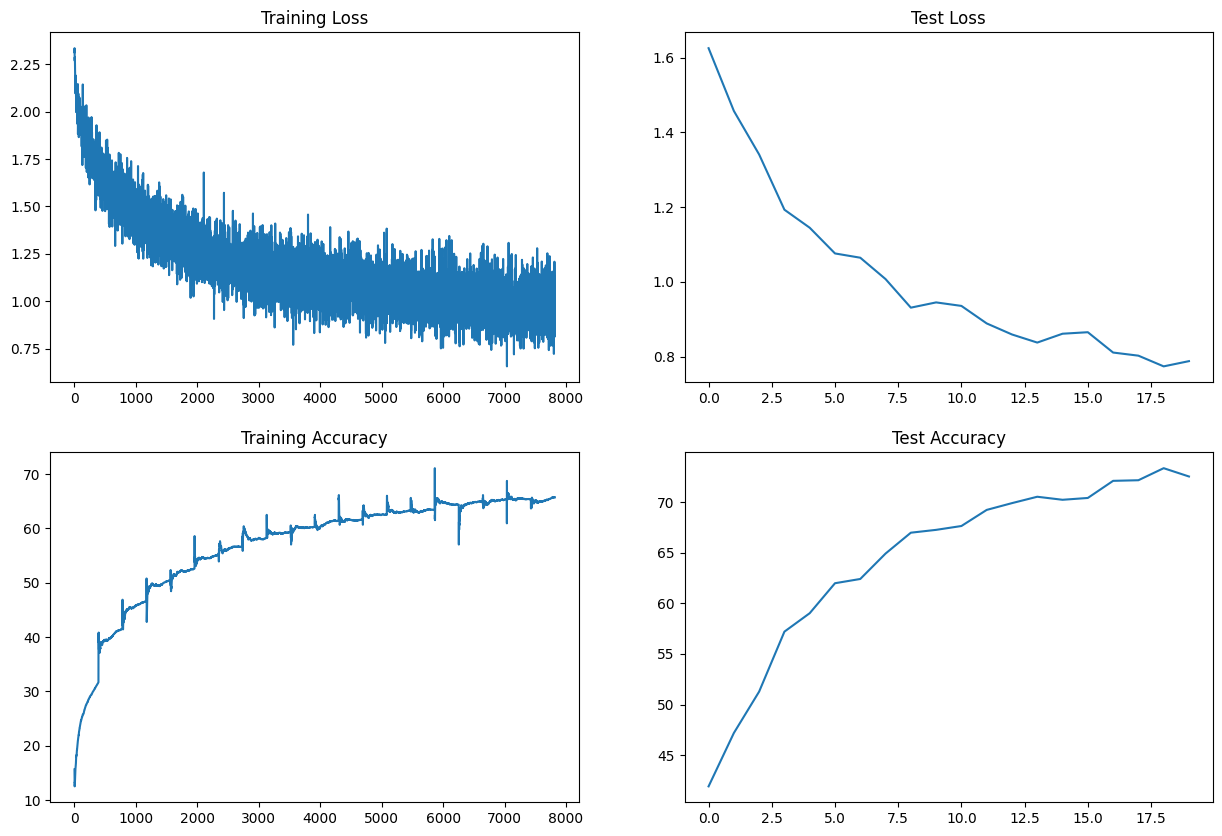

In [52]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [53]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))

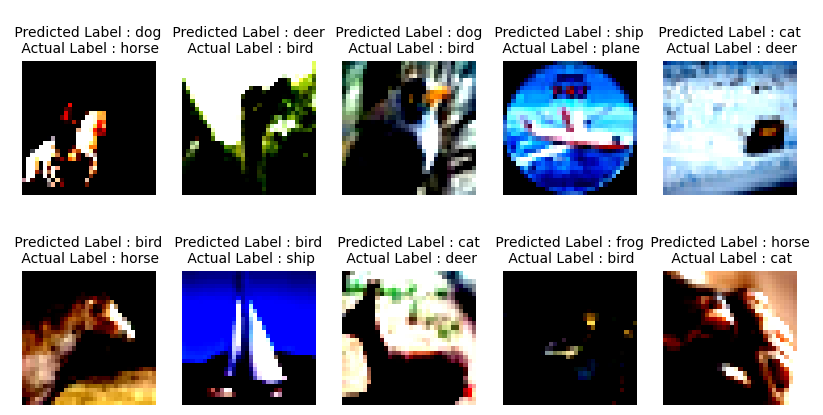

In [54]:
display_incorrect_images(wrong_prediction_list, n=10 )